In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
install.packages("seastests")
library(seastests)
install.packages("tidyverse")
library(tidyverse)
install.packages("tseries")
library(tseries)
install.packages("MLmetrics")
library(MLmetrics)
install.packages("ggplot2")
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘g

In [ ]:
data <- read.csv("data (6).csv")
colnames(data)
print(head(data, 24))

[1] "periodid"           "periodname"         "Freetown"          
[4] "Rural.western.area"

   periodid periodname Freetown Rural.western.area
1    202301     Jan-23      178                148
2    202302     Feb-23       66                 88
3    202303     Mar-23      143                109
4    202304     Apr-23       72                 95
5    202305     May-23      266                343
6    202306     Jun-23      260                161
7    202307     Jul-23      327                152
8    202308     Aug-23      290                241
9    202309     Sep-23      344                120
10   202310     Oct-23      150                 76
11   202311     Nov-23      451                 92
12   202312     Dec-23      141                104
13   202401     Jan-24      178                148
14   202402     Feb-24       66                 88
15   202403     Mar-24       72                 95
16   202404     Apr-24      143                109
17   202405     May-24      266                343
18   202406     Jun-24      260                161
19   202407     Jul-24      327

In [ ]:
Freetown <- as.numeric(data$Freetown)
Rural.western.area <- as.numeric(data$Rural.western.area)
data_ts_Freetown <- ts(Freetown, start = c(2023, 1), end=c(2024, 12), frequency = 12)
data_ts_Rural.western.area <- ts(Rural.western.area, start = c(2023, 1), end=c(2024, 12), frequency = 12)
data_ts_Freetown
data_ts_Rural.western.area

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,178,66,143,72,266,260,327,290,344,150,451,141
2024,178,66,72,143,266,260,327,290,344,451,150,141


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,148,88,109,95,343,161,152,241,120,76,92,104
2024,148,88,95,109,343,161,152,241,120,92,76,104


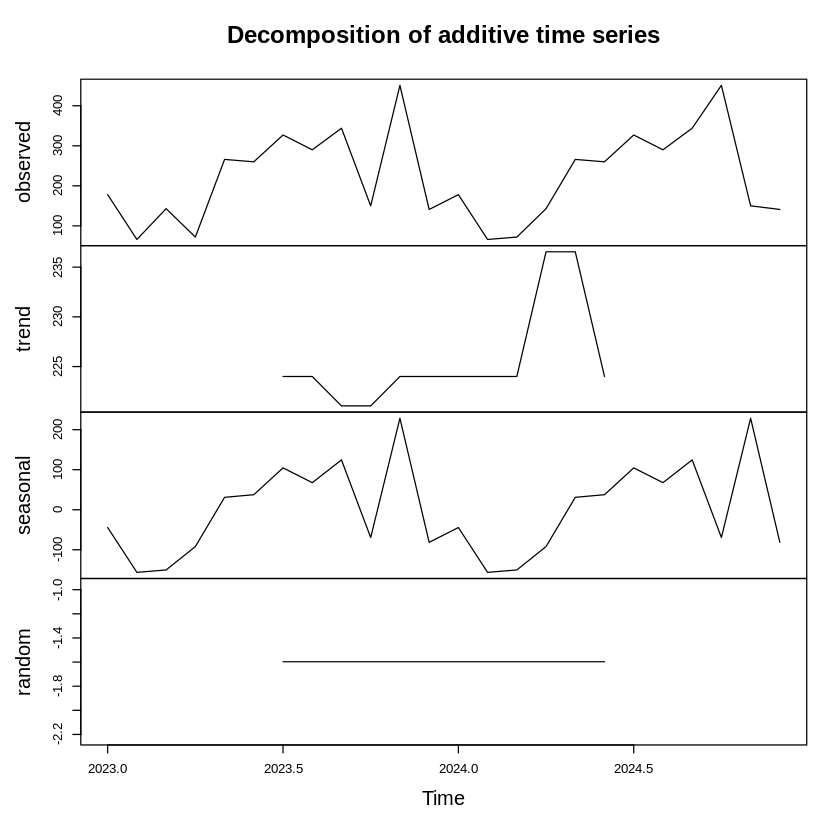

Summary of Decomposition for Freetown:


         Length Class  Mode     
x        24     ts     numeric  
seasonal 24     ts     numeric  
trend    24     ts     numeric  
random   24     ts     numeric  
figure   12     -none- numeric  
type      1     -none- character


Summary of Decomposition for Rural Western Area:


         Length Class  Mode     
x        24     ts     numeric  
seasonal 24     ts     numeric  
trend    24     ts     numeric  
random   24     ts     numeric  
figure   12     -none- numeric  
type      1     -none- character

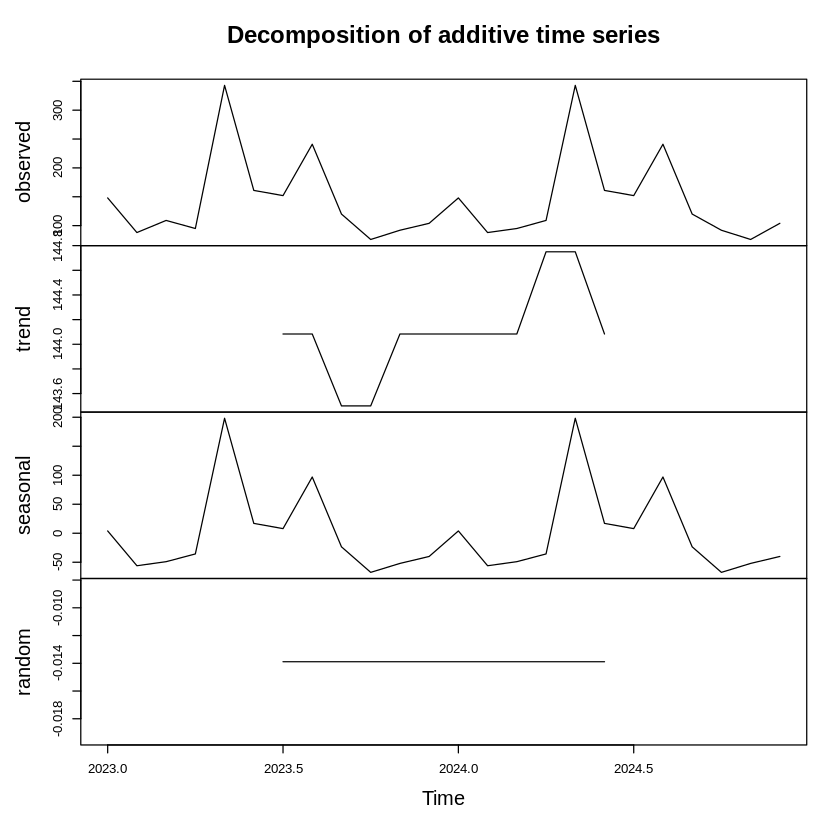

In [ ]:
# Decompose the time series for Freetown
decomposed_Freetown <- decompose(data_ts_Freetown)

# Plot the components for Freetown
plot(decomposed_Freetown)

# Extract the components for Freetown
trend_Freetown <- decomposed_Freetown$trend
seasonal_Freetown <- decomposed_Freetown$seasonal
random_Freetown <- decomposed_Freetown$random

# Decompose the time series for Rural Western Area
decomposed_Rural <- decompose(data_ts_Rural.western.area)

# Plot the components for Rural Western Area
plot(decomposed_Rural)

# Extract the components for Rural Western Area
trend_Rural <- decomposed_Rural$trend
seasonal_Rural <- decomposed_Rural$seasonal
random_Rural <- decomposed_Rural$random

# Display summaries of the decomposed components
cat("Summary of Decomposition for Freetown:\n")
summary(decomposed_Freetown)

cat("\nSummary of Decomposition for Rural Western Area:\n")
summary(decomposed_Rural)



In [ ]:
isSeasonal(data_ts_Freetown, test = "fried")
isSeasonal(data_ts_Freetown, test = "kw")
isSeasonal(data_ts_Freetown, test = "seasdum")
isSeasonal(data_ts_Freetown, test = "welch")
isSeasonal(data_ts_Freetown, test = "qs", freq = 2)
isSeasonal(data_ts_Rural.western.area, test = "fried")
isSeasonal(data_ts_Rural.western.area, test = "kw")
isSeasonal(data_ts_Rural.western.area, test = "seasdum")
isSeasonal(data_ts_Rural.western.area, test = "welch")
isSeasonal(data_ts_Rural.western.area, test = "qs", freq = 2)

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] NA

[1] FALSE

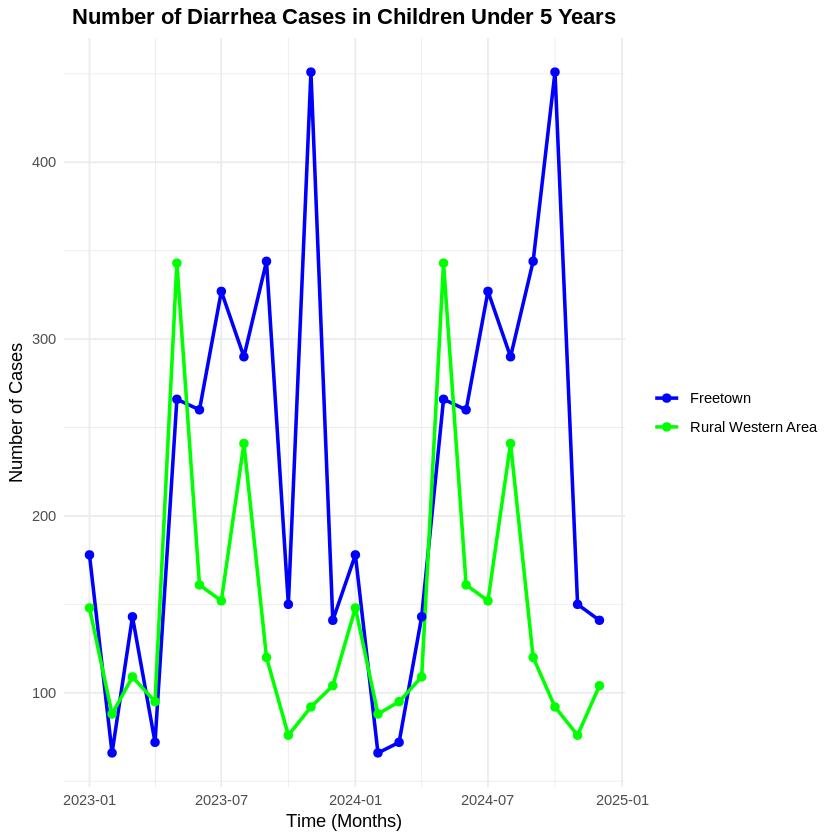

In [ ]:
library(ggplot2)

# Creating a combined data frame for plotting
data_combined <- data.frame(
  Period = rep(seq.Date(from = as.Date("2023-01-01"), to = as.Date("2024-12-01"), by = "month"), 2),
  Cases = c(as.numeric(data$Freetown), as.numeric(data$Rural.western.area)),
  Location = rep(c("Freetown", "Rural Western Area"), each = nrow(data))
)


ggplot(data_combined, aes(x = Period, y = Cases, color = Location, group = Location)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  ggtitle("Number of Diarrhea Cases in Children Under 5 Years") +
  xlab("Time (Months)") +
  ylab("Number of Cases") +
  scale_color_manual(values = c("blue", "green")) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.title = element_blank()
  )


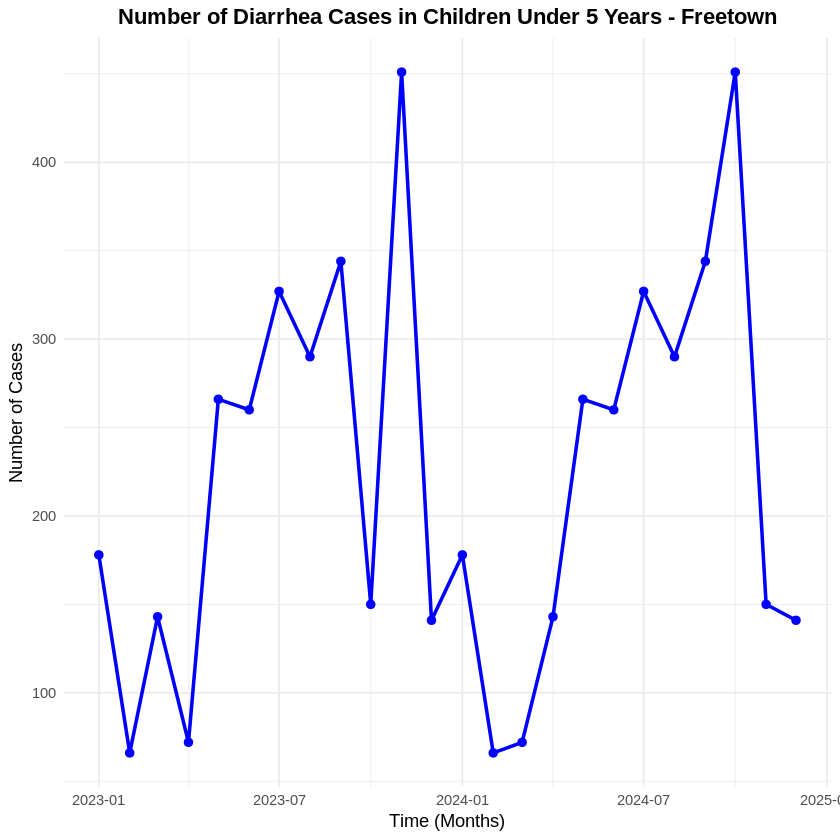

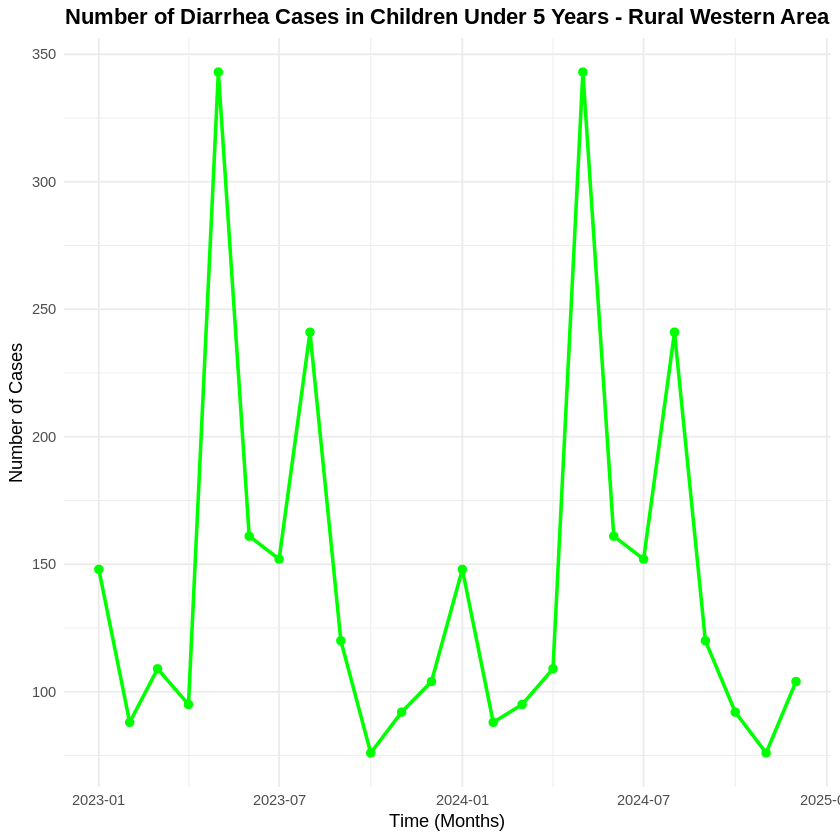

In [ ]:
library(ggplot2)

# Creating separate data frames for each location
data_freetown <- data.frame(
  Period = seq.Date(from = as.Date("2023-01-01"), to = as.Date("2024-12-01"), by = "month"),
  Cases = as.numeric(data$Freetown)
)

data_rural <- data.frame(
  Period = seq.Date(from = as.Date("2023-01-01"), to = as.Date("2024-12-01"), by = "month"),
  Cases = as.numeric(data$Rural.western.area)
)

# Plot for Freetown
ggplot(data_freetown, aes(x = Period, y = Cases)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "blue", size = 2) +
  ggtitle("Number of Diarrhea Cases in Children Under 5 Years - Freetown") +
  xlab("Time (Months)") +
  ylab("Number of Cases") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

# Plot for Rural Western Area
ggplot(data_rural, aes(x = Period, y = Cases)) +
  geom_line(color = "green", size = 1) +
  geom_point(color = "green", size = 2) +
  ggtitle("Number of Diarrhea Cases in Children Under 5 Years - Rural Western Area") +
  xlab("Time (Months)") +
  ylab("Number of Cases") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )


**Decomposing the time series here-**


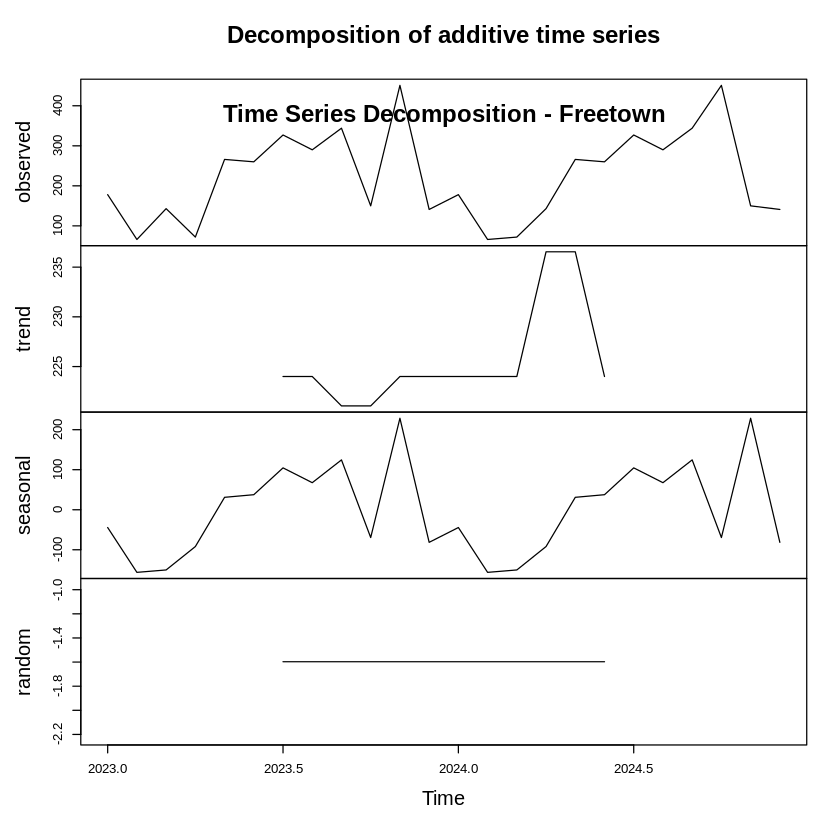

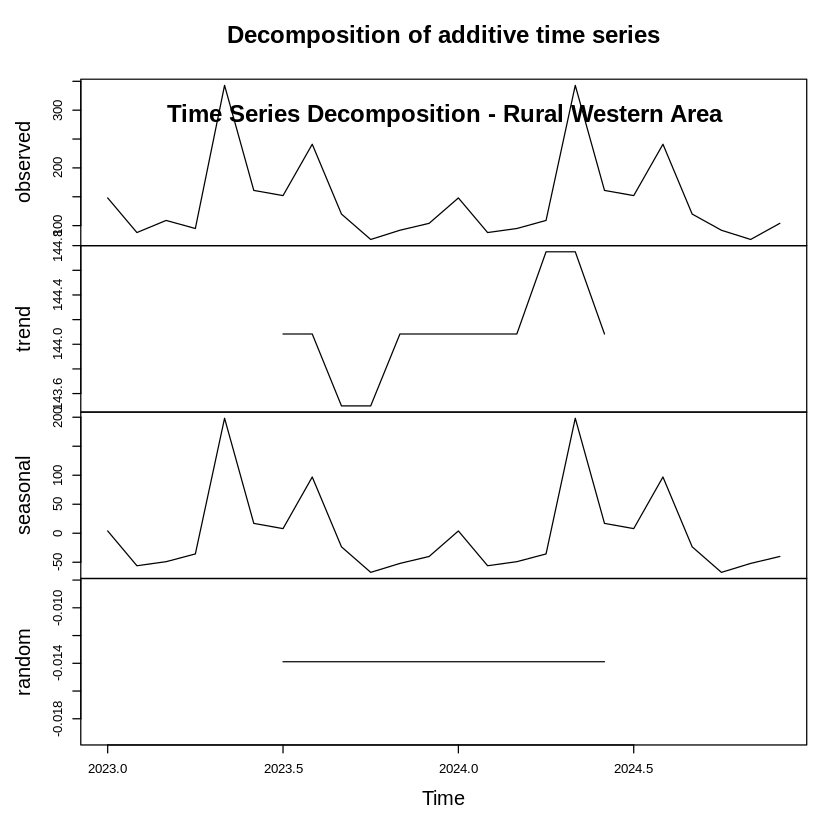

In [ ]:
# Decomposing the time series for Freetown
decomp_freetown <- decompose(data_ts_Freetown)

# Decomposing the time series for Rural Western Area
decomp_rural <- decompose(data_ts_Rural.western.area)

# Plotting the decomposition for Freetown
plot(decomp_freetown)

# Adding a title for clarity
title("Time Series Decomposition - Freetown", line = -1)

# Plotting the decomposition for Rural Western Area
plot(decomp_rural)

# Adding a title for clarity
title("Time Series Decomposition - Rural Western Area", line = -1)





**Splitting the data into Training and testing set.**

In [ ]:
# Splitting the data for Freetown
train_freetown <- window(data_ts_Freetown, start = c(2023, 1), end = c(2024, 6)) # First 18 months
test_freetown <- window(data_ts_Freetown, start = c(2024, 7), end = c(2024, 12)) # Last 6 months

# Splitting the data for Rural Western Area
train_rural <- window(data_ts_Rural.western.area, start = c(2023, 1), end = c(2024, 6)) # First 18 months
test_rural <- window(data_ts_Rural.western.area, start = c(2024, 7), end = c(2024, 12)) # Last 6 months

# Displaying the training and testing sets
train_freetown
test_freetown

train_rural
test_rural


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,178,66,143,72,266,260,327,290,344,150,451,141
2024,178,66,72,143,266,260,,,,,,


,Jul,Aug,Sep,Oct,Nov,Dec
2024,327,290,344,451,150,141


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,148,88,109,95,343,161,152,241,120,76,92,104
2024,148,88,95,109,343,161,,,,,,


,Jul,Aug,Sep,Oct,Nov,Dec
2024,152,241,120,92,76,104


Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


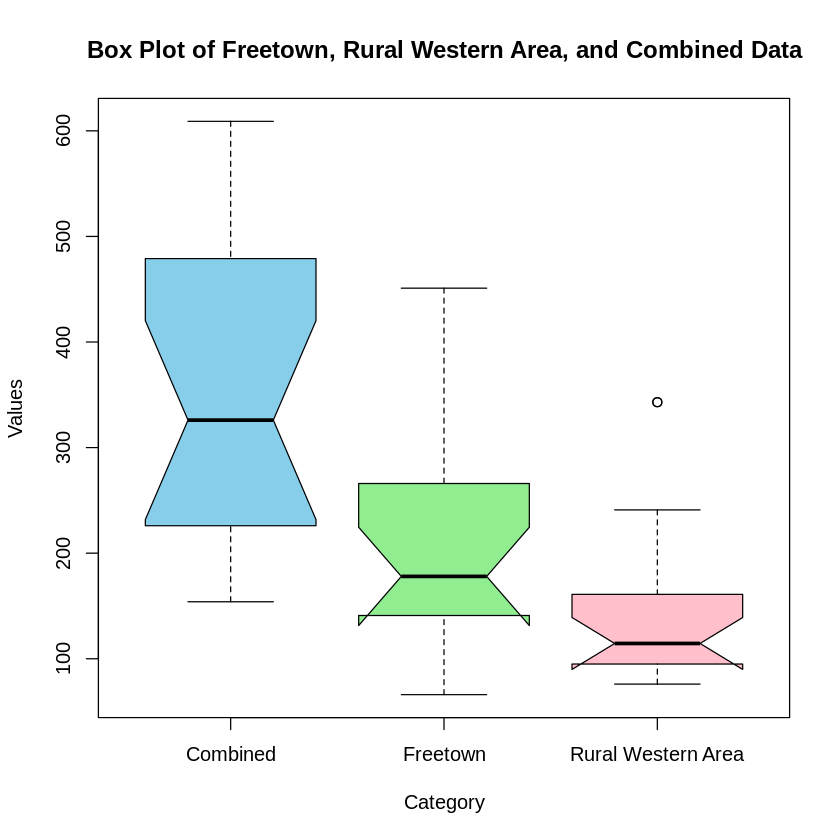

In [ ]:
#To see outliers


combined_train <- ts(train_freetown + train_rural,
                     start = start(train_freetown),
                     frequency = frequency(train_freetown))


data_for_boxplot <- data.frame(
  Category = rep(c("Freetown", "Rural Western Area", "Combined"),
                 times = c(length(train_freetown), length(train_rural), length(combined_train))),
  Values = c(as.numeric(train_freetown),
             as.numeric(train_rural),
             as.numeric(combined_train))
)

boxplot(Values ~ Category, data = data_for_boxplot,
        main = "Box Plot of Freetown, Rural Western Area, and Combined Data",
        xlab = "Category",
        ylab = "Values",
        col = c("skyblue", "lightgreen", "pink"),
        outline = TRUE,  # Show outliers
        notch = TRUE)    # Add notch to visualize medians

### **Forecasting using Auto arima using Freetown and Rural western area last 24 months data**

Freetown Metrics:
MAPE: 40.56926 %
Forecasted values for next year (rounded): 204 204 204 204 204 204 204 204 204 204 204 204 

Rural Western Area Metrics:
MAPE: 44.2655 %
Forecasted values for next year (rounded): 149 149 149 149 149 149 149 149 149 149 149 149 



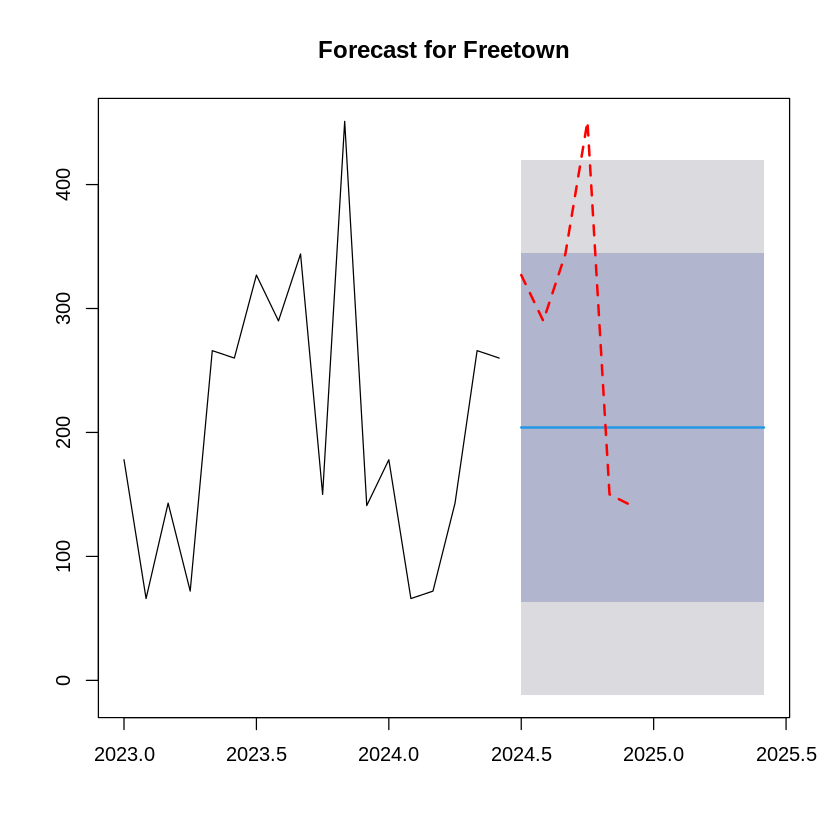

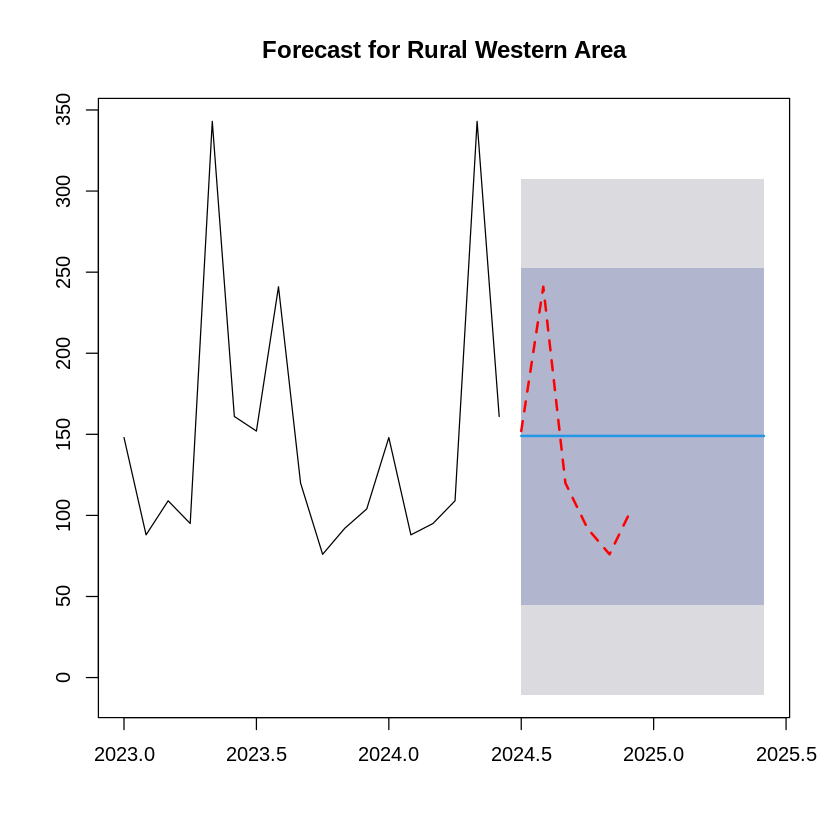

In [ ]:
library(forecast)
library(MLmetrics)

# Forecasting for Freetown
# Fitting the ARIMA model
model_freetown <- auto.arima(train_freetown)

# Forecasting for the next year (12 months)
forecast_freetown <- forecast(model_freetown, h = 12)
forecast_freetown$mean <- round(forecast_freetown$mean)  # Round off forecasted values

# Calculating MAPE for Freetown
mape_freetown <- accuracy(forecast_freetown, test_freetown)["Test set", "MAPE"]

# Forecasting for Rural Western Area
# Fitting the ARIMA model
model_rural <- auto.arima(train_rural)

# Forecasting for the next year (12 months)
forecast_rural <- forecast(model_rural, h = 12)
forecast_rural$mean <- round(forecast_rural$mean)  # Round off forecasted values

# Calculating MAPE for Rural Western Area
mape_rural <- accuracy(forecast_rural, test_rural)["Test set", "MAPE"]

# Display results
cat("Freetown Metrics:\n")
cat("MAPE:", mape_freetown, "%\n")
cat("Forecasted values for next year (rounded):", forecast_freetown$mean, "\n\n")

cat("Rural Western Area Metrics:\n")
cat("MAPE:", mape_rural, "%\n")
cat("Forecasted values for next year (rounded):", forecast_rural$mean, "\n\n")

# Plotting the forecasts
plot(forecast_freetown, main = "Forecast for Freetown")
lines(test_freetown, col = "red", lty = 2, lwd = 2) # Adding actual test values

plot(forecast_rural, main = "Forecast for Rural Western Area")
lines(test_rural, col = "red", lty = 2, lwd = 2) # Adding actual test values


## Forecasting using ETS model


# ETS model for forecasting using the last 24 months data of Freetown and Rural western area

Freetown ETS Metrics:
MAPE: 40.57113 %
Rural Western Area ETS Metrics:
MAPE: 45.34901 %
Combined ETS Metrics:
MAPE: 36.49934 %


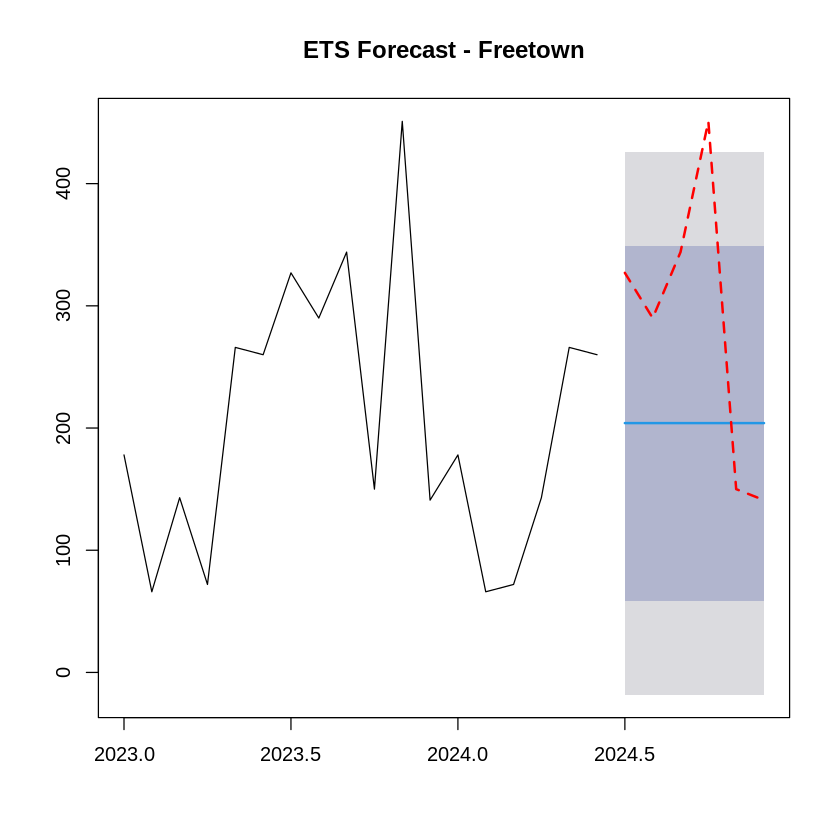

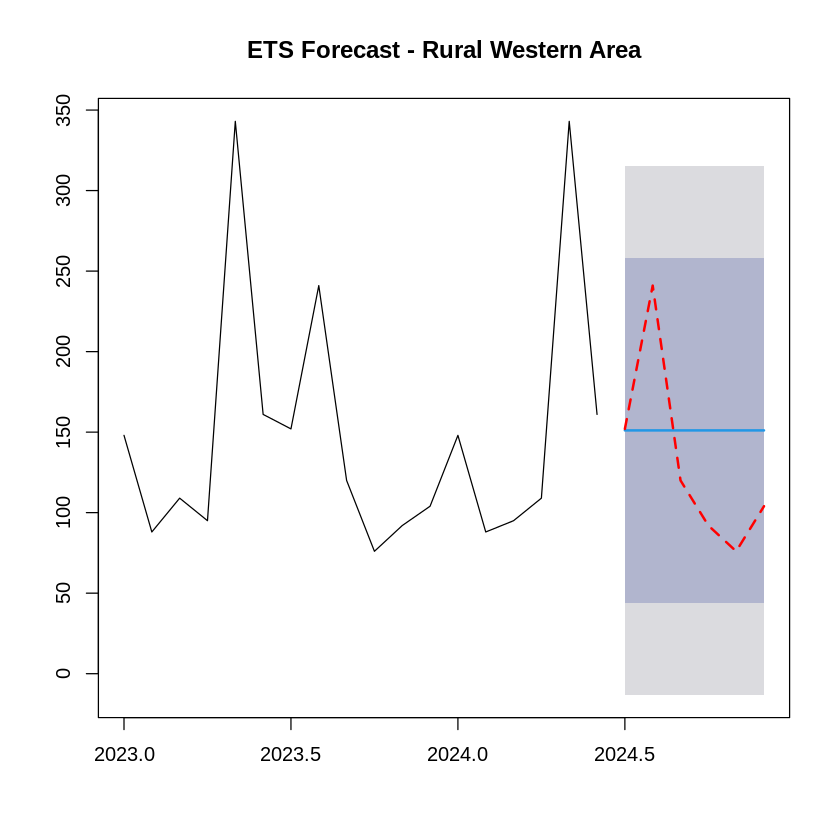

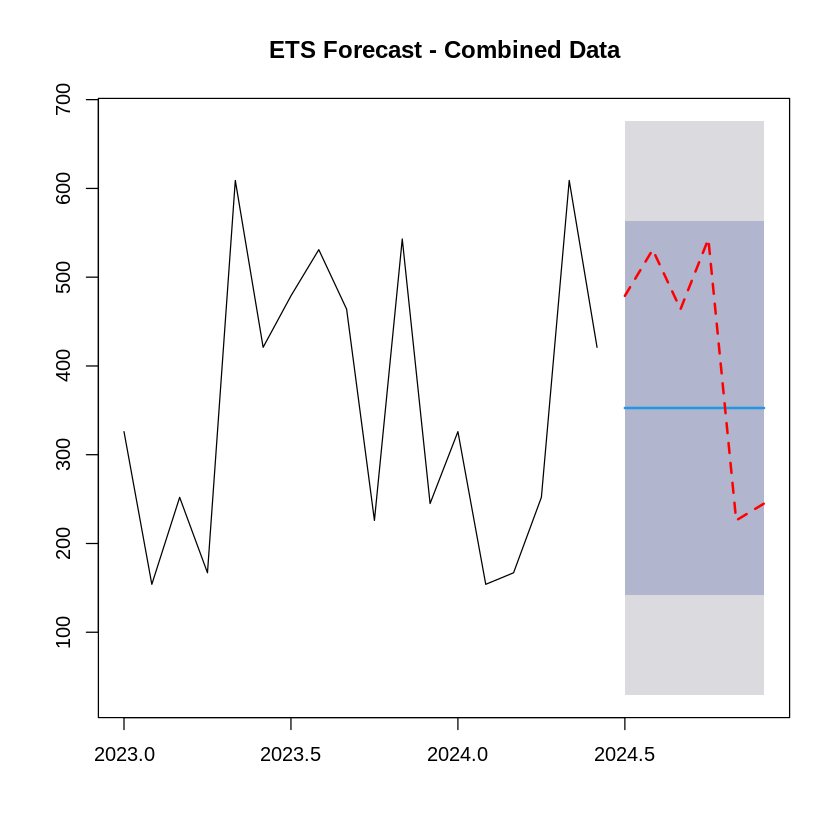

In [ ]:
# Combine the training and testing data for Freetown and Rural Western Area
combined_train <- ts(train_freetown + train_rural,
                     start = start(train_freetown),
                     frequency = frequency(train_freetown))
combined_test <- ts(test_freetown + test_rural,
                    start = start(test_freetown),
                    frequency = frequency(test_freetown))

# Load libraries
library(forecast)
library(MLmetrics)

# Step 1: Fit ETS models on individual and combined training data
model_freetown <- ets(train_freetown)
model_rural <- ets(train_rural)
model_combined <- ets(combined_train)

# Step 2: Forecast for the next 6 months
forecast_freetown <- forecast(model_freetown, h = 6)
forecast_rural <- forecast(model_rural, h = 6)
forecast_combined <- forecast(model_combined, h = 6)

# Step 3: Calculate evaluation metrics

# --- Metrics for Freetown ---
mape_freetown <- mean(abs((test_freetown - forecast_freetown$mean) / test_freetown)) * 100
mae_freetown <- mean(abs(test_freetown - forecast_freetown$mean))
smape_freetown <- mean(200 * abs(test_freetown - forecast_freetown$mean) /
                       (abs(test_freetown) + abs(forecast_freetown$mean)))
rmsle_freetown <- sqrt(mean((log1p(test_freetown) - log1p(forecast_freetown$mean))^2))
ss_total_freetown <- sum((test_freetown - mean(test_freetown))^2)
ss_residual_freetown <- sum((test_freetown - forecast_freetown$mean)^2)
r2_freetown <- 1 - (ss_residual_freetown / ss_total_freetown)

# --- Metrics for Rural Western Area ---
mape_rural <- mean(abs((test_rural - forecast_rural$mean) / test_rural)) * 100
mae_rural <- mean(abs(test_rural - forecast_rural$mean))
smape_rural <- mean(200 * abs(test_rural - forecast_rural$mean) /
                    (abs(test_rural) + abs(forecast_rural$mean)))
rmsle_rural <- sqrt(mean((log1p(test_rural) - log1p(forecast_rural$mean))^2))
ss_total_rural <- sum((test_rural - mean(test_rural))^2)
ss_residual_rural <- sum((test_rural - forecast_rural$mean)^2)
r2_rural <- 1 - (ss_residual_rural / ss_total_rural)

# --- Metrics for Combined Data ---
mape_combined <- mean(abs((combined_test - forecast_combined$mean) / combined_test)) * 100
mae_combined <- mean(abs(combined_test - forecast_combined$mean))
smape_combined <- mean(200 * abs(combined_test - forecast_combined$mean) /
                       (abs(combined_test) + abs(forecast_combined$mean)))
rmsle_combined <- sqrt(mean((log1p(combined_test) - log1p(forecast_combined$mean))^2))
ss_total_combined <- sum((combined_test - mean(combined_test))^2)
ss_residual_combined <- sum((combined_test - forecast_combined$mean)^2)
r2_combined <- 1 - (ss_residual_combined / ss_total_combined)

# Step 4: Display results
cat("Freetown ETS Metrics:\n")
cat("MAPE:", mape_freetown, "%\n")


cat("Rural Western Area ETS Metrics:\n")
cat("MAPE:", mape_rural, "%\n")

cat("Combined ETS Metrics:\n")
cat("MAPE:", mape_combined, "%\n")


# Step 5: Plot the forecasts
# Plot for Freetown
plot(forecast_freetown, main = "ETS Forecast - Freetown")
lines(test_freetown, col = "red", lty = 2, lwd = 2)  # Test data

# Plot for Rural Western Area
plot(forecast_rural, main = "ETS Forecast - Rural Western Area")
lines(test_rural, col = "red", lty = 2, lwd = 2)  # Test data

# Plot for Combined Data
plot(forecast_combined, main = "ETS Forecast - Combined Data")
lines(combined_test, col = "red", lty = 2, lwd = 2)  # Test data


In [ ]:
# Check for seasonal parameters explicitly
cat("\nFreetown Model Details:\n")
if (any(model_freetown$arma[6:7] > 0)) {  # Seasonal ARIMA only if P or Q > 0
  cat("Model Type: Seasonal ARIMA (SARIMA)\n")
} else {
  cat("Model Type: Non-Seasonal ARIMA\n")
}
cat("Model Order: ARIMA(",
    model_freetown$arma[1], ", ",  # p
    model_freetown$arma[6], ", ",  # d
    model_freetown$arma[2],  # q
    ")\n")
cat("Seasonal Frequency:", model_freetown$arma[5], "\n")  # Display seasonal frequency
if (!is.null(model_freetown$include.mean) && model_freetown$include.mean) {
  cat("The model includes a non-zero mean.\n")
} else {
  cat("The model does not include a mean term.\n")
}

cat("\nRural Western Area Model Details:\n")
if (any(model_rural$arma[6:7] > 0)) {  # Seasonal ARIMA only if P or Q > 0
  cat("Model Type: Seasonal ARIMA (SARIMA)\n")
} else {
  cat("Model Type: Non-Seasonal ARIMA\n")
}
cat("Model Order: ARIMA(",
    model_rural$arma[1], ", ",  # p
    model_rural$arma[6], ", ",  # d
    model_rural$arma[2],  # q
    ")\n")
cat("Seasonal Frequency:", model_rural$arma[5], "\n")  # Display seasonal frequency
if (!is.null(model_rural$include.mean) && model_rural$include.mean) {
  cat("The model includes a non-zero mean.\n")
} else {
  cat("The model does not include a mean term.\n")
}



Freetown Model Details:
Model Type: Non-Seasonal ARIMA
Model Order: ARIMA( 0 ,  0 ,  0 )
Seasonal Frequency: 12 
The model does not include a mean term.

Rural Western Area Model Details:
Model Type: Non-Seasonal ARIMA
Model Order: ARIMA( 0 ,  0 ,  0 )
Seasonal Frequency: 12 
The model does not include a mean term.


# Forecasting using Holtwinters for Freetown and Rural western area

Warning message in ets(x, "AAA", alpha = alpha, beta = beta, gamma = gamma, phi = phi, :
“Seasonal component could not be estimated”
Warning message in ets(x, "AAA", alpha = alpha, beta = beta, gamma = gamma, phi = phi, :
“Seasonal component could not be estimated”


Freetown Metrics:
MAPE: 188.6384 %
RMSE: 423.4442 
MAE: 339.1401 
SMAPE: 71.27202 %
RMSLE: 1.055365 
R-squared: -13.98812 

Rural Western Area Metrics:
MAPE: 134.9426 %
RMSE: 149.7101 
MAE: 130.7512 
SMAPE: 69.99711 %
RMSLE: 0.8780406 
R-squared: -6.497352 


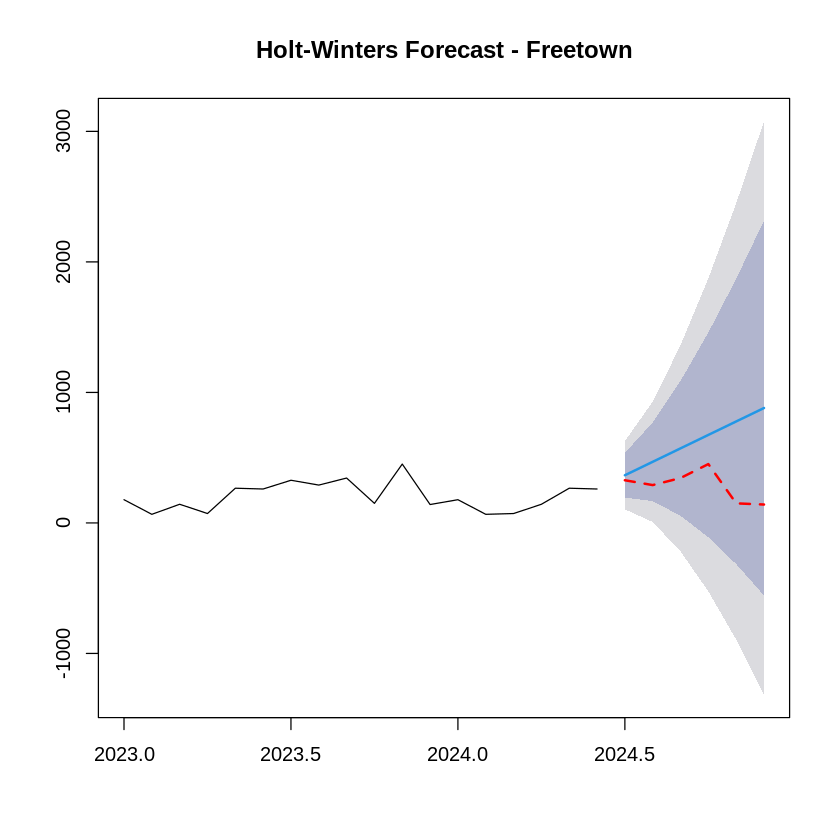

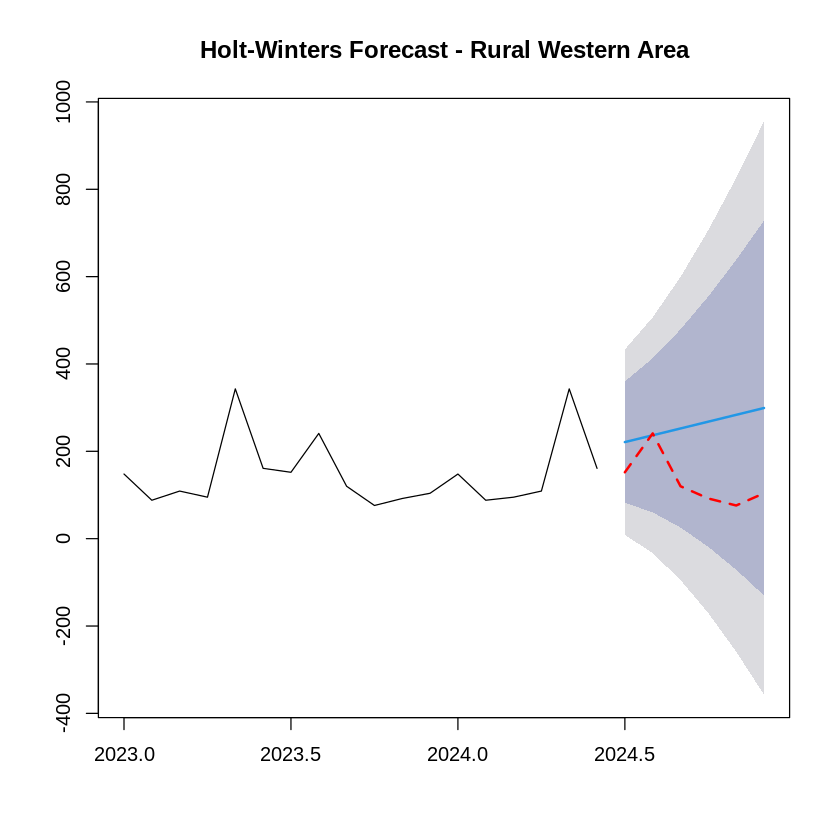

In [ ]:
library(forecast)

# Holt-Winters Model for Freetown
model_freetown_hw <- hw(train_freetown, h = 6, seasonal = "additive")  # Seasonal smoothing

# Efficiency Metrics for Freetown
mape_freetown_hw <- mean(abs((test_freetown - model_freetown_hw$mean) / test_freetown)) * 100
rmse_freetown_hw <- sqrt(mean((test_freetown - model_freetown_hw$mean)^2))
mae_freetown_hw <- mean(abs(test_freetown - model_freetown_hw$mean))
smape_freetown_hw <- mean(200 * abs(test_freetown - model_freetown_hw$mean) /
                          (abs(test_freetown) + abs(model_freetown_hw$mean)))
rmsle_freetown_hw <- sqrt(mean((log1p(test_freetown) - log1p(model_freetown_hw$mean))^2))
r2_freetown_hw <- 1 - sum((test_freetown - model_freetown_hw$mean)^2) /
                  sum((test_freetown - mean(test_freetown))^2)

# Holt-Winters Model for Rural Western Area
model_rural_hw <- hw(train_rural, h = 6, seasonal = "additive")

# Efficiency Metrics for Rural Western Area
mape_rural_hw <- mean(abs((test_rural - model_rural_hw$mean) / test_rural)) * 100
rmse_rural_hw <- sqrt(mean((test_rural - model_rural_hw$mean)^2))
mae_rural_hw <- mean(abs(test_rural - model_rural_hw$mean))
smape_rural_hw <- mean(200 * abs(test_rural - model_rural_hw$mean) /
                       (abs(test_rural) + abs(model_rural_hw$mean)))
rmsle_rural_hw <- sqrt(mean((log1p(test_rural) - log1p(model_rural_hw$mean))^2))
r2_rural_hw <- 1 - sum((test_rural - model_rural_hw$mean)^2) /
               sum((test_rural - mean(test_rural))^2)

# Displaying Metrics
cat("Freetown Metrics:\n")
cat("MAPE:", mape_freetown_hw, "%\n")
cat("RMSE:", rmse_freetown_hw, "\n")
cat("MAE:", mae_freetown_hw, "\n")
cat("SMAPE:", smape_freetown_hw, "%\n")
cat("RMSLE:", rmsle_freetown_hw, "\n")
cat("R-squared:", r2_freetown_hw, "\n\n")

cat("Rural Western Area Metrics:\n")
cat("MAPE:", mape_rural_hw, "%\n")
cat("RMSE:", rmse_rural_hw, "\n")
cat("MAE:", mae_rural_hw, "\n")
cat("SMAPE:", smape_rural_hw, "%\n")
cat("RMSLE:", rmsle_rural_hw, "\n")
cat("R-squared:", r2_rural_hw, "\n")

# Plotting the Forecasts
# Holt-Winters for Freetown
plot(model_freetown_hw, main = "Holt-Winters Forecast - Freetown")
lines(test_freetown, col = "red", lty = 2, lwd = 2)  # Adding actual test values

# Holt-Winters for Rural Western Area
plot(model_rural_hw, main = "Holt-Winters Forecast - Rural Western Area")
lines(test_rural, col = "red", lty = 2, lwd = 2)  # Adding actual test values


## Forecasting using SES for Freetown and Rural western area

Freetown Metrics:
MAPE: 40.57144 %
RMSE: 135.3761 
MAE: 118.8128 
SMAPE: 45.77287 %
RMSLE: 0.4944965 
R-squared: -0.5319289 

Rural Western Area Metrics:
MAPE: 44.00319 %
RMSE: 57.45828 
MAE: 49.66545 
SMAPE: 36.31194 %
RMSLE: 0.4218202 
R-squared: -0.1043601 


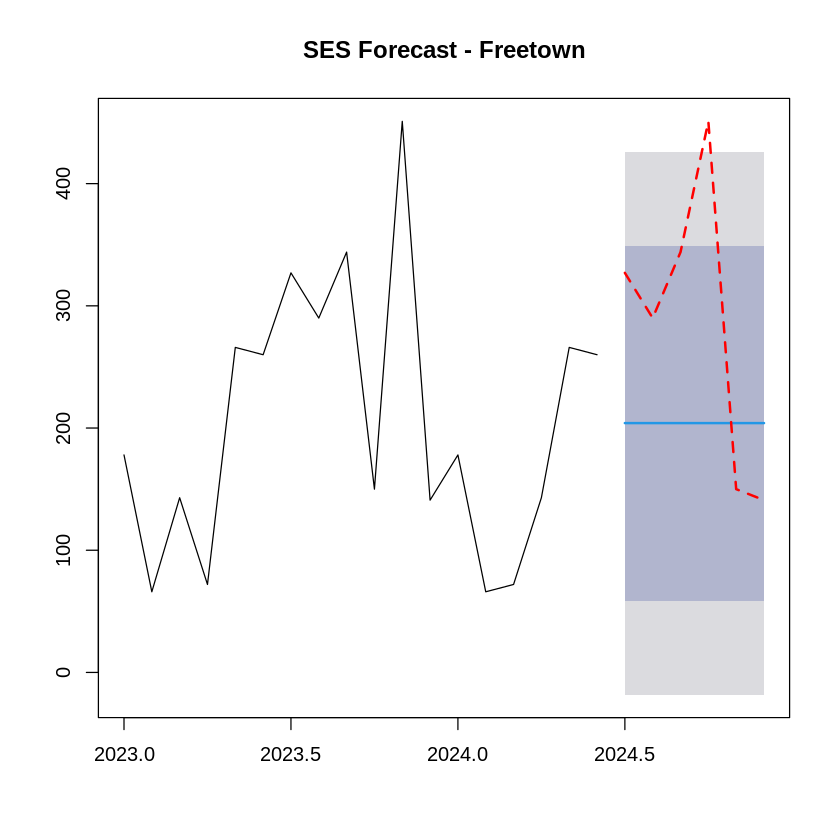

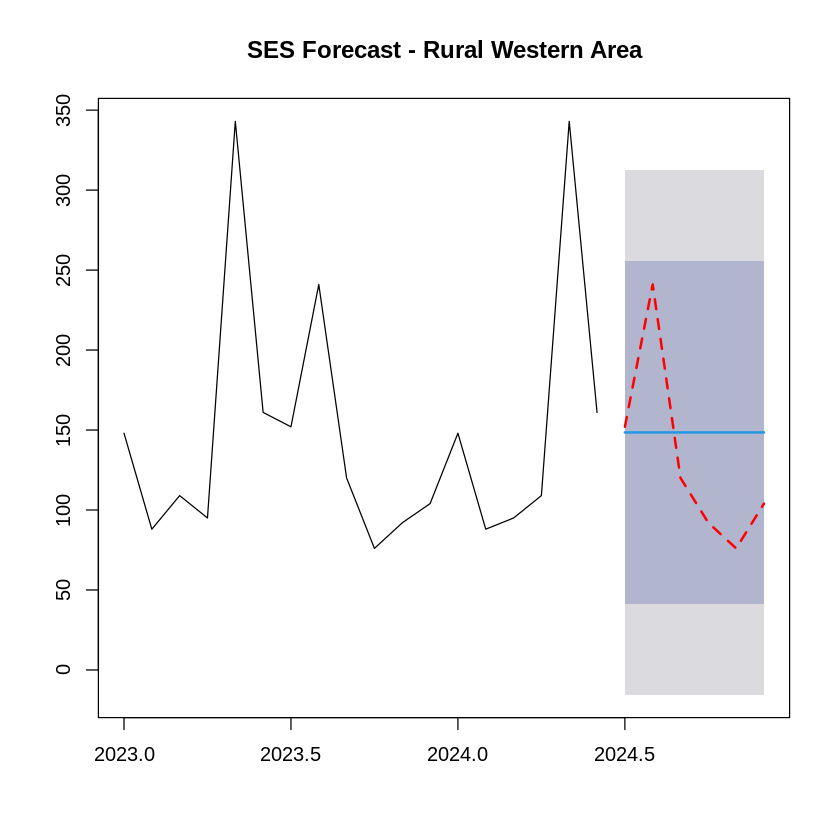

In [ ]:
library(forecast)

# SES Model for Freetown
model_freetown_ses <- ses(train_freetown, h = 6)  # Simple Exponential Smoothing

# Efficiency Metrics for Freetown
mape_freetown_ses <- mean(abs((test_freetown - model_freetown_ses$mean) / test_freetown)) * 100
rmse_freetown_ses <- sqrt(mean((test_freetown - model_freetown_ses$mean)^2))
mae_freetown_ses <- mean(abs(test_freetown - model_freetown_ses$mean))
smape_freetown_ses <- mean(200 * abs(test_freetown - model_freetown_ses$mean) /
                           (abs(test_freetown) + abs(model_freetown_ses$mean)))
rmsle_freetown_ses <- sqrt(mean((log1p(test_freetown) - log1p(model_freetown_ses$mean))^2))
r2_freetown_ses <- 1 - sum((test_freetown - model_freetown_ses$mean)^2) /
                   sum((test_freetown - mean(test_freetown))^2)

# SES Model for Rural Western Area
model_rural_ses <- ses(train_rural, h = 6)

# Efficiency Metrics for Rural Western Area
mape_rural_ses <- mean(abs((test_rural - model_rural_ses$mean) / test_rural)) * 100
rmse_rural_ses <- sqrt(mean((test_rural - model_rural_ses$mean)^2))
mae_rural_ses <- mean(abs(test_rural - model_rural_ses$mean))
smape_rural_ses <- mean(200 * abs(test_rural - model_rural_ses$mean) /
                        (abs(test_rural) + abs(model_rural_ses$mean)))
rmsle_rural_ses <- sqrt(mean((log1p(test_rural) - log1p(model_rural_ses$mean))^2))
r2_rural_ses <- 1 - sum((test_rural - model_rural_ses$mean)^2) /
                sum((test_rural - mean(test_rural))^2)

# Displaying Metrics
cat("Freetown Metrics:\n")
cat("MAPE:", mape_freetown_ses, "%\n")
cat("RMSE:", rmse_freetown_ses, "\n")
cat("MAE:", mae_freetown_ses, "\n")
cat("SMAPE:", smape_freetown_ses, "%\n")
cat("RMSLE:", rmsle_freetown_ses, "\n")
cat("R-squared:", r2_freetown_ses, "\n\n")

cat("Rural Western Area Metrics:\n")
cat("MAPE:", mape_rural_ses, "%\n")
cat("RMSE:", rmse_rural_ses, "\n")
cat("MAE:", mae_rural_ses, "\n")
cat("SMAPE:", smape_rural_ses, "%\n")
cat("RMSLE:", rmsle_rural_ses, "\n")
cat("R-squared:", r2_rural_ses, "\n")

# Plotting the Forecasts
# SES for Freetown
plot(model_freetown_ses, main = "SES Forecast - Freetown")
lines(test_freetown, col = "red", lty = 2, lwd = 2)  # Adding actual test values

# SES for Rural Western Area
plot(model_rural_ses, main = "SES Forecast - Rural Western Area")
lines(test_rural, col = "red", lty = 2, lwd = 2)  # Adding actual test values



**Selected AutoArima due to MAPE value**

In [ ]:

packets_per_day <- 3
days_per_case <- 5
total_packets_freetown <- sum(forecasted_cases_freetown) * packets_per_day * days_per_case
cat("Minimum ORS stock required for Freetown for the next year (5 days per case):", total_packets_freetown, "\n")


forecasted_cases_rural <- forecast_rural$mean
total_packets_rural <- sum(forecasted_cases_rural) * packets_per_day * days_per_case
cat("Minimum ORS stock required for Rural Western Area for the next year (5 days per case):", total_packets_rural, "\n")

total_packets_district <- total_packets_freetown + total_packets_rural
cat("Total minimum ORS stock required for the district for the next year (5 days per case):", total_packets_district, "\n")


Minimum ORS stock required for Freetown for the next year (5 days per case): 36730 
Minimum ORS stock required for Rural Western Area for the next year (5 days per case): 26730 
Total minimum ORS stock required for the district for the next year (5 days per case): 63460 
